In [ ]:
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

In [ ]:
X_train = []

In [ ]:
y_train = ([1] * 23244) + ([0] * 23765)

In [ ]:
import os
path = "/content/Training/female/"
i = 0
for filename in os.listdir(path):
    dir = path + str(i) + ".jpg"
    os.rename(path + filename, dir)
    img = tf.io.read_file(dir)
    tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
    tensor = tf.image.resize(tensor, [80, 80])
    X_train.append(tensor)
    i += 1
print(i)
path = "/content/Training/male/"
for filename in os.listdir(path):
    dir = path + str(i) + ".jpg"
    os.rename(path + filename, dir)
    img = tf.io.read_file(dir)
    tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
    tensor = tf.image.resize(tensor, [80, 80])
    X_train.append(tensor)
    i += 1
print(i)

23243
47009


In [ ]:
x_train = []
y_train = []

In [ ]:
x_train = tf.Variable(X_train)
y_train = tf.Variable(y_train)

In [ ]:
x_train.shape, y_train.shape

(TensorShape([47009, 80, 80, 3]), TensorShape([47009]))

femail - 1


In [ ]:
tf.random.set_seed(42)
x_train = tf.random.shuffle(x_train, seed=42)
y_train = tf.random.shuffle(y_train, seed=42)

tf.Tensor(1, shape=(), dtype=int32)


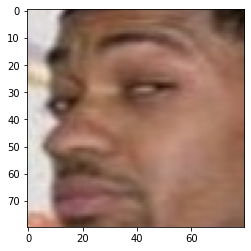

In [ ]:
plt.imshow(x_train[23243])
print(y_train[23243])

In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(80, 80, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])


model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(x_train, y_train, epochs=5)

Epoch 1/5
1470/1470 [==============================] - 27s 8ms/step - loss: 0.2765 - accuracy: 0.8851
Epoch 2/5
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1877 - accuracy: 0.9295
Epoch 3/5
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1684 - accuracy: 0.9382
Epoch 4/5
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1564 - accuracy: 0.9423
Epoch 5/5
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1465 - accuracy: 0.9465


In [ ]:
path = "/content/Validation/female/"
x_test = []
y_test = []
i = 0
for filename in os.listdir(path):
    dir = path + str(i) + ".jpg"
    os.rename(path + filename, dir)
    img = tf.io.read_file(dir)
    tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
    tensor = tf.image.resize(tensor, [80, 80])
    x_test.append(tensor)
    y_test.append(1)
    i += 1
print(i)
path = "/content/Validation/male/"
for filename in os.listdir(path):
    dir = path + str(i) + ".jpg"
    os.rename(path + filename, dir)
    img = tf.io.read_file(dir)
    tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
    tensor = tf.image.resize(tensor, [80, 80])
    x_test.append(tensor)
    y_test.append(0)
    i += 1
print(i)

5841
11649


In [ ]:
accuracy = 0
t = 11649
for i in range(0,t):
    
    answer = model_1.predict(tf.expand_dims(x_test[i], axis=0))
    if round(float(answer)) == y_test[i]:
        accuracy += 1
    else:
        continue
        # plt.imshow(x_test[i])
        # plt.show()
        # print(f"Answer is {answer}")
        # print(f"True answer is {y_test[i]}")


print(f"accuracy is {100 * accuracy / float(t)}")

accuracy is 95.33007125075113
